# Describe queries
Compare assigned labels to query features
1. Calculate query lengths, questions
2. Describe df, variables
3. Make EDA report
4. Summarize features x categories
5. *Show significant relationships*

Variables:
- Categorical (search strings, label strings)
- Continuous (search features)

In [1]:
import math
import nltk
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Load the data

In [2]:
df = pd.read_excel('./search-terms-20120901-20160901.xlsx',sheet_name=2) # first sheets are unrefined, third is refined
df['Search_Term'] = df['Search_Term'].astype(str) # queries as strings
df['Level_0'] = df['Level_0'].astype("category") # levels as categorical
df['Level_1'] = df['Level_1'].astype("category") # levels as categorical
df['Level_2'] = df['Level_2'].astype("category") # levels as categorical
df['Label'] = df['Label'].astype("category") # labels as categorical
# df = df.drop(columns=['Link','Notes','Time_After_Search']) # remove url, annotation notes
df = df.drop(columns=['Percent_Search_Exits','Time_After_Search']) # remove url, annotation notes, unused fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Search_Term                   1554 non-null   object  
 1   Level_0                       1554 non-null   category
 2   Level_1                       1554 non-null   category
 3   Level_2                       1554 non-null   category
 4   Label                         1554 non-null   category
 5   Total_Unique_Searches         1554 non-null   int64   
 6   Results_Pageviews_Per_Search  1554 non-null   float64 
 7   Percent_Search_Refinements    1554 non-null   float64 
 8   Search_Duration_Seconds       1554 non-null   int64   
 9   Average_Search_Depth          1554 non-null   float64 
dtypes: category(4), float64(3), int64(2), object(1)
memory usage: 80.1+ KB


Get query lengths

In [3]:
def query_len(term):
    """Get search tokens per query"""
    search_terms = nltk.word_tokenize(term)
    return len(search_terms)

df['Query_Length'] = df['Search_Term'].apply(query_len)

Determine if any queries contain questions


In [4]:
def query_questions(term):
    """Check if query tokens have question keywords"""
    question_words = ["what","who","where","when","why","how","which","whom","whose","whether","did","do","does","am","are","is","will","have","has"]
    search_terms = nltk.word_tokenize(term)
    for term in search_terms:
        if term in question_words:
            return 1
        else:
            return 0
    
df['Query_Question'] = df['Search_Term'].apply(query_questions)

Pull out examples of questions in queries


In [5]:
df[df['Query_Question']==1]

Search_Term      Level_0  Level_1  \
697                                       are you happy  Exploratory  Keyword   
906   do children of asian immigrants speak english ...  Exploratory  Keyword   
1124                 how couples meet and stay together        Known     Name   
1444                                   how couples meet        Known     Name   

     Level_2            Label  Total_Unique_Searches  \
697    Topic  Keyword - Topic                    205   
906    Topic  Keyword - Topic                    163   
1124   Study     Name - Study                    132   
1444   Study     Name - Study                    106   

      Results_Pageviews_Per_Search  Percent_Search_Refinements  \
697                           1.77                      0.0716   
906                           2.58                      0.2048   
1124                          2.83                      0.0936   
1444                          2.53                      0.1679   

      Search_Duration_Seconds  Average_Search_Depth  Query_Length  \
697                       218                 11.02             3   
906                       371                  4.48            18   
1124                      396                  5.80             6   
1444                      378                  6.27             3   

      Query_Question  
697                1  
906                1  
1124               1  
1444               1

Describe df
- categorical 
- continuous

In [6]:
df.describe(include='object')

Search_Term
count              1554
unique             1554
top     dating violence
freq                  1

In [7]:
df.describe()

Total_Unique_Searches  Results_Pageviews_Per_Search  \
count            1554.000000                   1554.000000   
mean              362.112613                      3.395579   
std               628.491009                      0.962517   
min               100.000000                      1.010000   
25%               128.000000                      2.690000   
50%               186.500000                      3.380000   
75%               339.750000                      4.010000   
max             10148.000000                      7.740000   

       Percent_Search_Refinements  Search_Duration_Seconds  \
count                 1554.000000              1554.000000   
mean                     0.184353               306.611969   
std                      0.076640               106.743728   
min                      0.000000                 0.000000   
25%                      0.138350               244.000000   
50%                      0.175400               297.000000   
75%                      0.220475               356.000000   
max                      0.679700              1168.000000   

       Average_Search_Depth  Query_Length  Query_Question  
count           1554.000000   1554.000000     1554.000000  
mean               3.373983      1.805019        0.002574  
std                1.331800      1.762805        0.050686  
min                0.000000      1.000000        0.000000  
25%                2.560000      1.000000        0.000000  
50%                3.280000      1.000000        0.000000  
75%                4.000000      2.000000        0.000000  
max               12.410000     24.000000        1.000000

In [8]:
df.head()

Search_Term      Level_0  Level_1 Level_2            Label  \
0       21600        Known   Number   Study   Number - Study   
1  add health        Known     Name  Series    Name - Series   
2   education  Exploratory  Keyword   Topic  Keyword - Topic   
3       crime  Exploratory  Keyword   Topic  Keyword - Topic   
4        nfss        Known     Name   Study     Name - Study   

   Total_Unique_Searches  Results_Pageviews_Per_Search  \
0                  10148                          1.68   
1                   8845                          2.68   
2                   7743                          3.95   
3                   6356                          4.08   
4                   5436                          1.21   

   Percent_Search_Refinements  Search_Duration_Seconds  Average_Search_Depth  \
0                      0.1129                      435                  4.75   
1                      0.1243                      404                  4.28   
2                      0.1887                      326                  3.63   
3                      0.1615                      341                  3.96   
4                      0.0111                       67                  0.69   

   Query_Length  Query_Question  
0             1               0  
1             2               0  
2             1               0  
3             1               0  
4             1               0

Make word clouds of the top query categories
- topics
- names

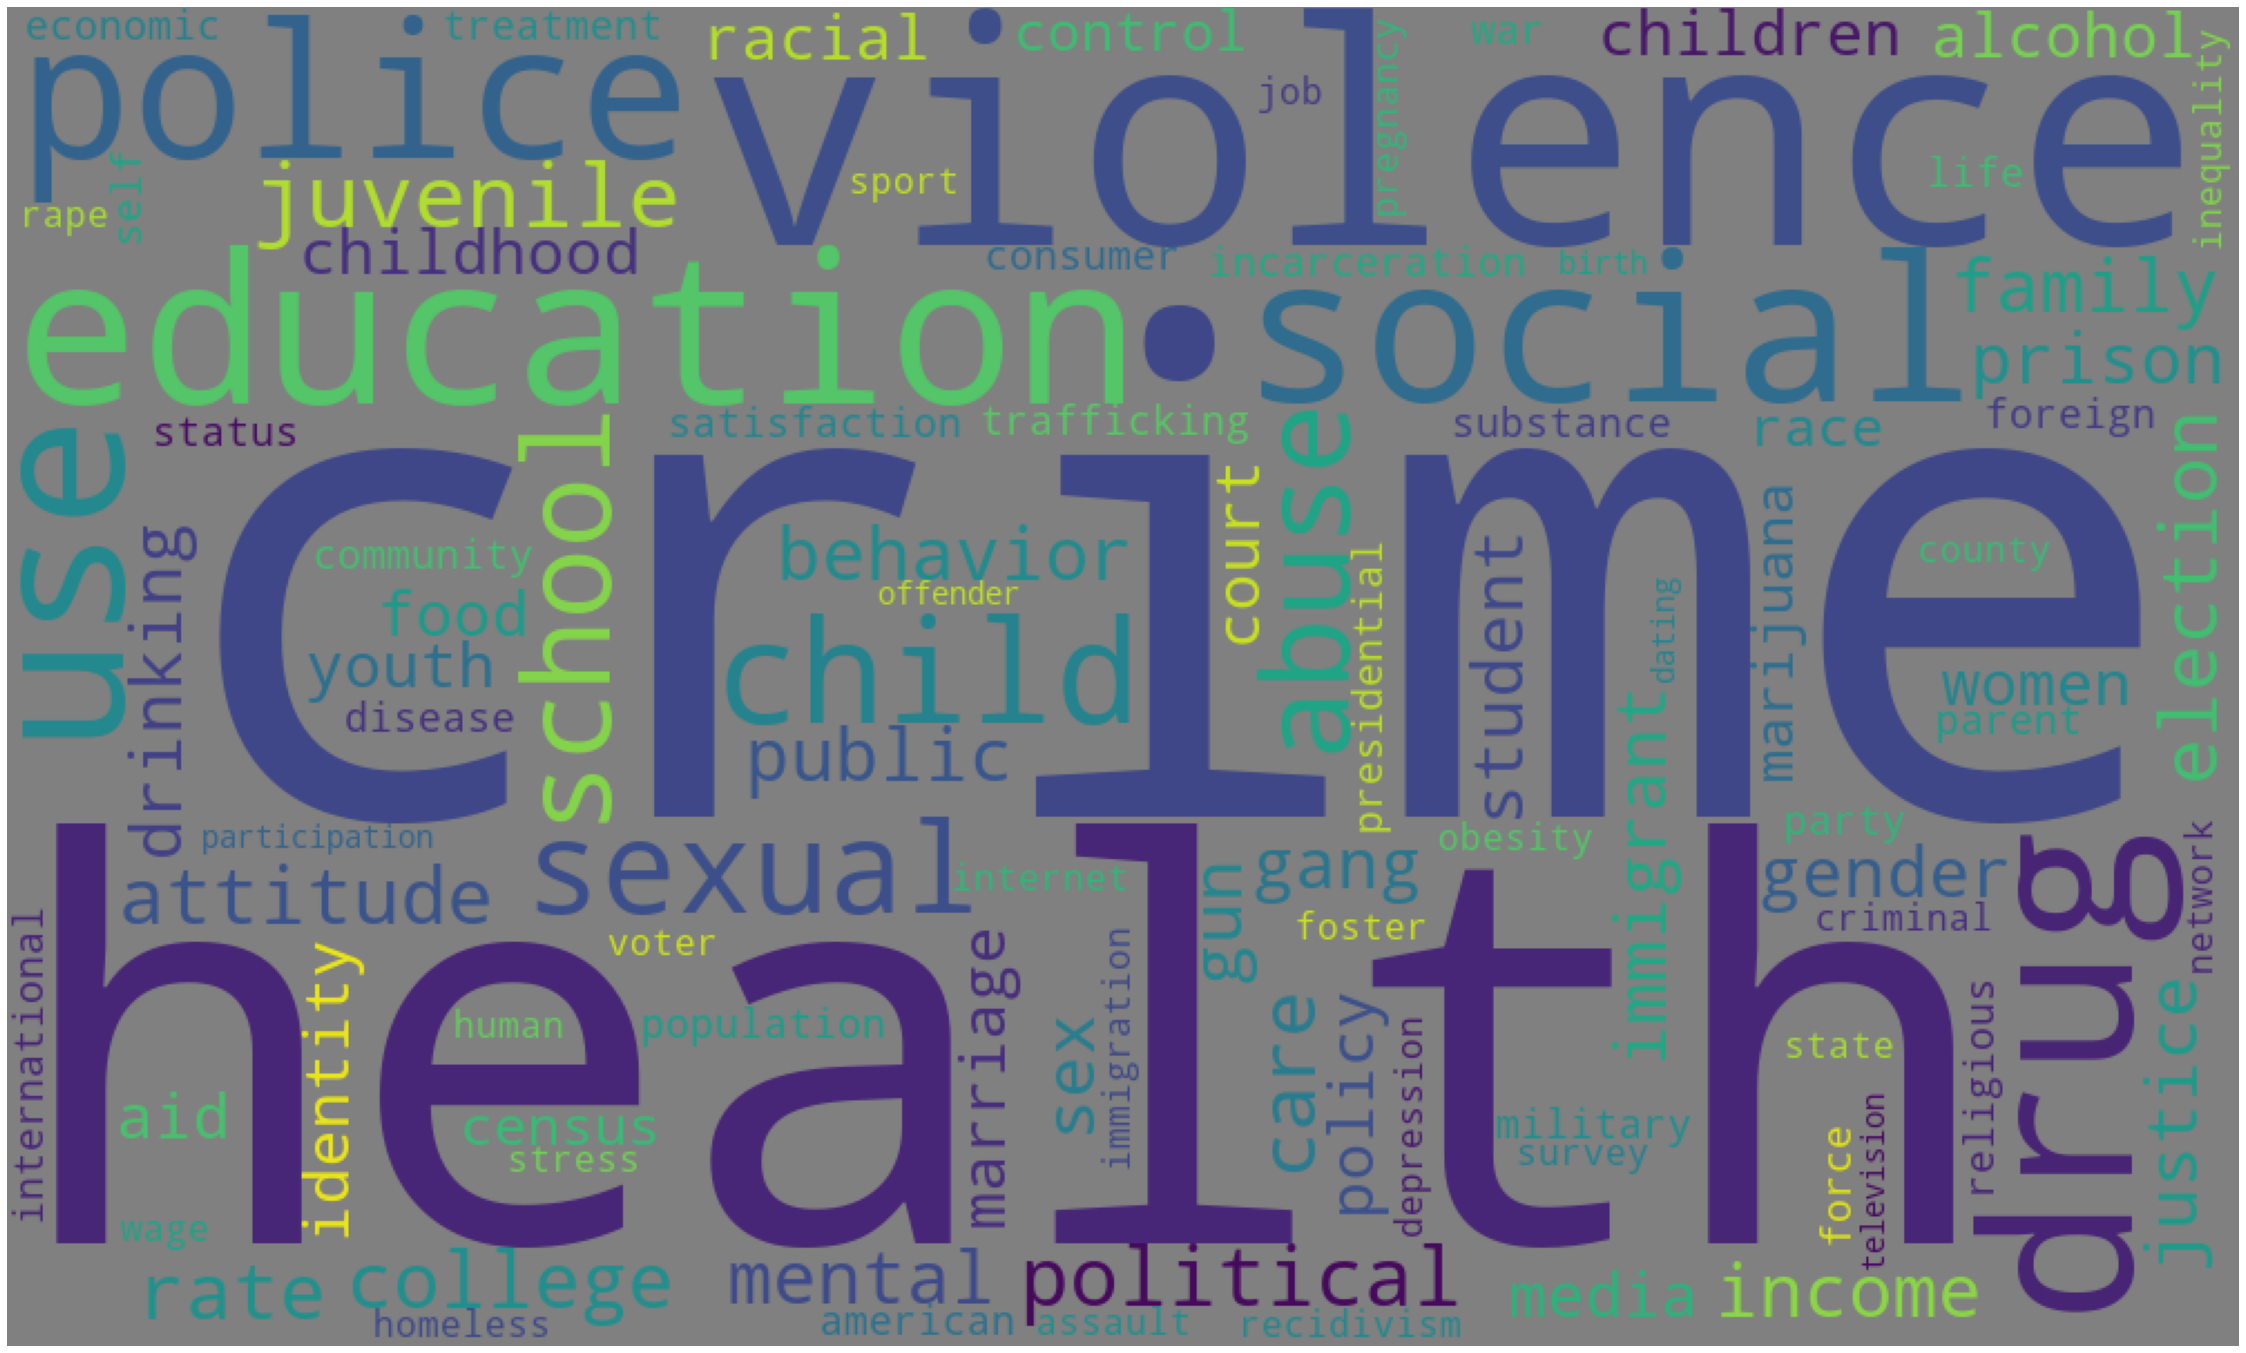

In [9]:
df_topics = df[df['Level_2']=="Topic"] # topic keywords (excluding dates, places)
topics_text = " ".join(review for review in df_topics['Search_Term'])

wordcloud = WordCloud(width= 1000, 
                      height = 600, 
                      max_words=100,
                      random_state=1, 
                      background_color='gray', 
                      colormap='viridis_r',
                      collocations=False, 
                      stopwords = STOPWORDS).generate(topics_text)

wordcloud.to_file("./topic_queries.png")

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

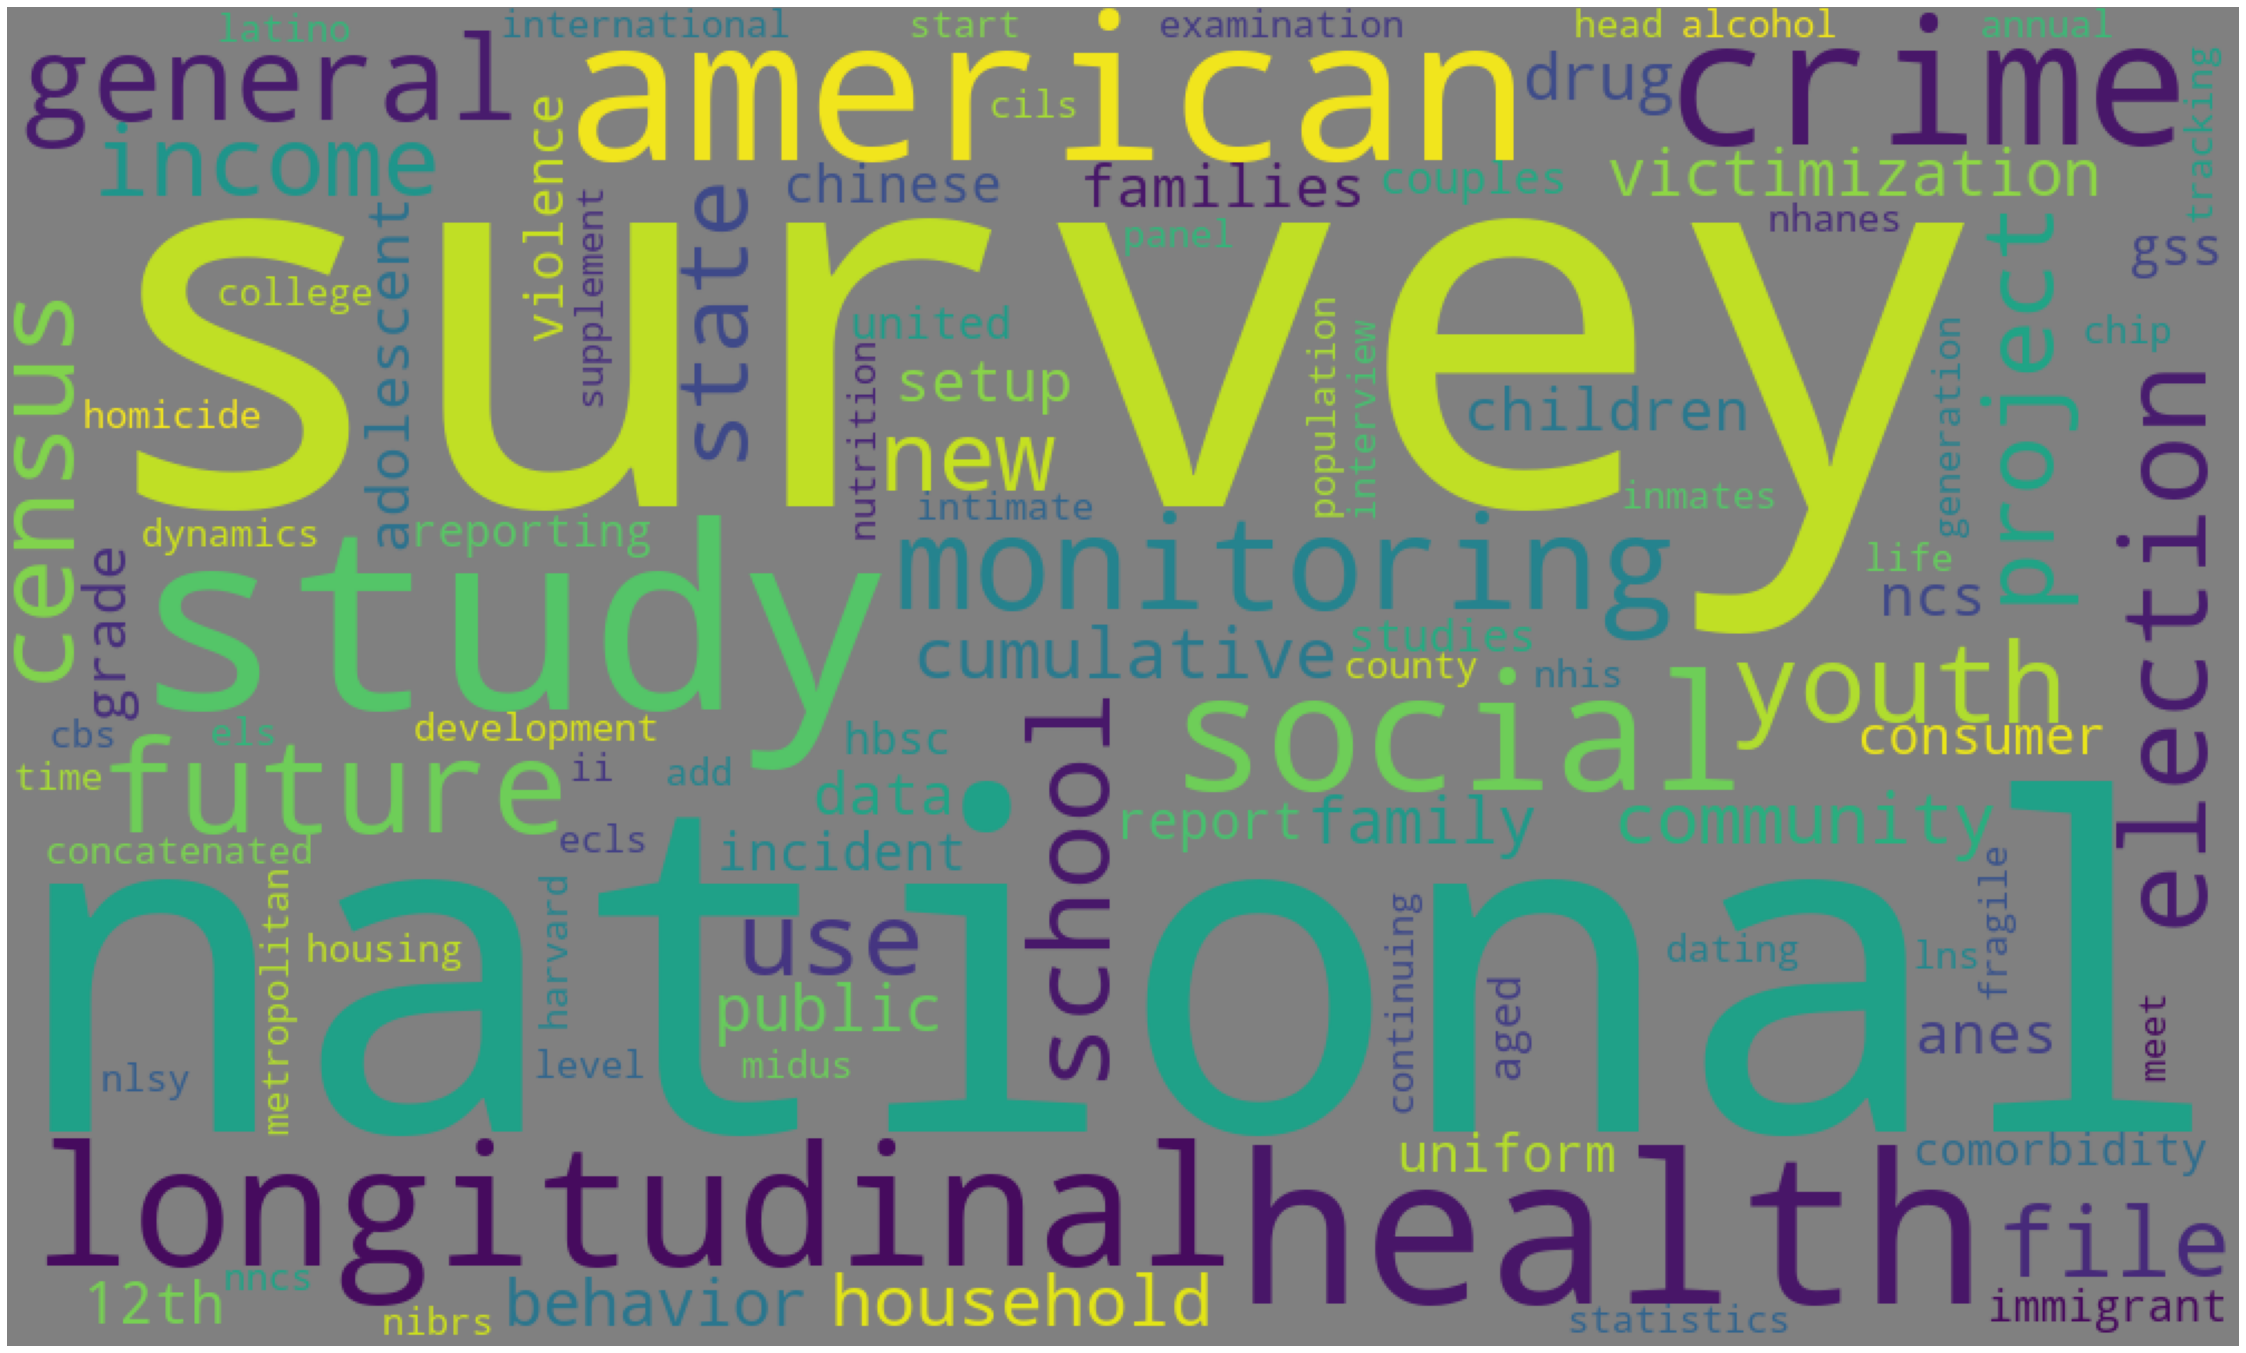

In [10]:
df_names = df[df['Level_1']=="Name"] # series and study names
names_text = " ".join(review for review in df_names['Search_Term'])

wordcloud = WordCloud(width= 1000, 
                      height = 600, 
                      max_words=100,
                      random_state=1, 
                      background_color='gray', 
                      colormap='viridis_r',
                      collocations=False, 
                      stopwords = STOPWORDS).generate(names_text)

wordcloud.to_file("./name_queries.png")

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

Make EDA report

In [11]:
profile = ProfileReport(df, title="ICPSR Queries Profiling Report (9/2012-9/2016)");
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
profile.to_file("./describe_queries_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Describe the features of the query groups
- groupby, describe
- crosstab

Questions:
1. L0: Are exploratory searches deeper, etc. than known-item searches? 
2. L1: Does the category of a query predict any of its typical interactions patterns?

- `Results_Pageviews_Per_Search`(number of things a user looked at after searching) == engagement
- `Percent_Search_Refinements` (share of sessions where a user adjusted or reformulated strategy) == imprecision
- `Average_Search_Depth` (number of pages clicked on following a search) == relevance
- `Search_Duration_Seconds` (amount of time spent in the session after search) == learning
- `Query_Length` (number of tokens in the query) == descriptiveness

In [13]:
pd.unique(df['Level_0'])

['Known', 'Exploratory']
Categories (2, object): ['Known', 'Exploratory']

In [14]:
pd.unique(df['Level_1'])

['Number', 'Name', 'Keyword', 'Author', 'Format']
Categories (5, object): ['Number', 'Name', 'Keyword', 'Author', 'Format']

In [15]:
grouped_categories = df.groupby(df['Level_1'])
grouped_categories.describe()

Total_Unique_Searches                                                \
                        count        mean          std    min    25%    50%   
Level_1                                                                       
Author                   29.0  300.551724   278.837329  102.0  140.0  206.0   
Format                   28.0  160.321429    58.848867  100.0  118.0  132.0   
Keyword                1131.0  351.288240   525.882348  100.0  129.0  190.0   
Name                    289.0  436.214533   824.473369  100.0  130.0  195.0   
Number                   77.0  339.545455  1146.409665  101.0  123.0  156.0   

                         Results_Pageviews_Per_Search            ...  \
            75%      max                        count      mean  ...   
Level_1                                                          ...   
Author   365.00   1296.0                         29.0  2.351379  ...   
Format   180.75    291.0                         28.0  3.797143  ...   
Keyword  350.00   7743.0                       1131.0  3.686614  ...   
Name     370.00   8845.0                        289.0  2.545363  ...   
Number   240.00  10148.0                         77.0  2.559091  ...   

        Query_Length       Query_Question                                     \
                 75%   max          count      mean       std  min  25%  50%   
Level_1                                                                        
Author           2.0   3.0           29.0  0.000000  0.000000  0.0  0.0  0.0   
Format           2.0   3.0           28.0  0.000000  0.000000  0.0  0.0  0.0   
Keyword          2.0  18.0         1131.0  0.001768  0.042033  0.0  0.0  0.0   
Name             4.0  24.0          289.0  0.006920  0.083044  0.0  0.0  0.0   
Number           1.0   3.0           77.0  0.000000  0.000000  0.0  0.0  0.0   

                   
         75%  max  
Level_1            
Author   0.0  0.0  
Format   0.0  0.0  
Keyword  0.0  1.0  
Name     0.0  1.0  
Number   0.0  0.0  

[5 rows x 56 columns]

Determine distributions of the features of interest

OPTION 1: manually define scaling
- Normal distributions (5) - normalize
    - Results_Pageviews_Per_Search
    - Percent_Search_Exits
    - Percent_Search_Refinements
    - Search_Duration_Seconds
    - Average_Search_Depth 
- Right-tailed distributions (2) - log transform
    - Total_Unique_Searches
    - Query_Length
- No specific distributions

OPTION 2: apply scaler to df
- normalize (min-max)
- standardize (centered on 0)

In [16]:
# OPTION 1

# def log_transform(x):
#     return np.log(x + 1)

# df_features['Total_Unique_Searches_norm'] = df_features['Total_Unique_Searches'].apply(log_transform)


# df_features['Query_Length_norm'] = (df_features['Query_Length'] - df_features['Query_Length'].mean()
#                            ) / df_features['Query_Length'].std()

# def create_quantiles(x, q):
#     return pd.qcut(x, q, labels=False, duplicates='drop')

# df_features['Query_Length_norm'] = create_quantiles(df_features['Query_Length'],3)

# sns.distplot(df_features['Query_Length_norm']) # check the new distribution

In [17]:
# OPTION 2

# df_features = df[['Total_Unique_Searches', 
#                   'Query_Length',
#                   'Results_Pageviews_Per_Search',
#                   'Percent_Search_Exits',
#                   'Percent_Search_Refinements',
#                   'Search_Duration_Seconds',
#                   'Average_Search_Depth']]

# scaler = MinMaxScaler() # normalize so all data are between 0-1
# scaler = StandardScaler() # z-score normalization; assumes all observations are normal, centered on 0

# array_scaled = scaler.fit_transform(df_features)
# array_scaled = normalize(df_features)
# array_scaled


Create and plot clusters

In [18]:
# kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42)
# kmeans.fit(array_scaled)

# # The lowest SSE value
# kmeans.inertia_

# # Final locations of the centroid
# kmeans.cluster_centers_

# # The number of iterations required to converge
# kmeans.n_iter_

# # The labels
# kmeans.labels_[:5]

In [19]:
# df_scaled = pd.DataFrame(array_scaled, columns = df_features.columns) # array back to df
# df_scaled

# sns.scatterplot(data = df_scaled, x = 'Total_Unique_Searches', y = 'Query_Length', hue = kmeans.labels_);


In [20]:
# sns.boxplot(x = kmeans.labels_, y = df['Label']);
